In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Employee_missing.csv')
df.head()

,employee_id,first_name,last_name,age,gender,department,salary
0,1,John,Doe,NaN,Male,Marketing,50000
1,2,Jane,Smith,28.0,Female,Sales,60000
2,3,Michael,Johnson,42.0,Male,NaN,70000
3,4,Emily,Williams,31.0,Female,HR,55000
4,5,James,Brown,37.0,Male,Operations,65000


In [4]:
!pip install missingno

<Axes: >

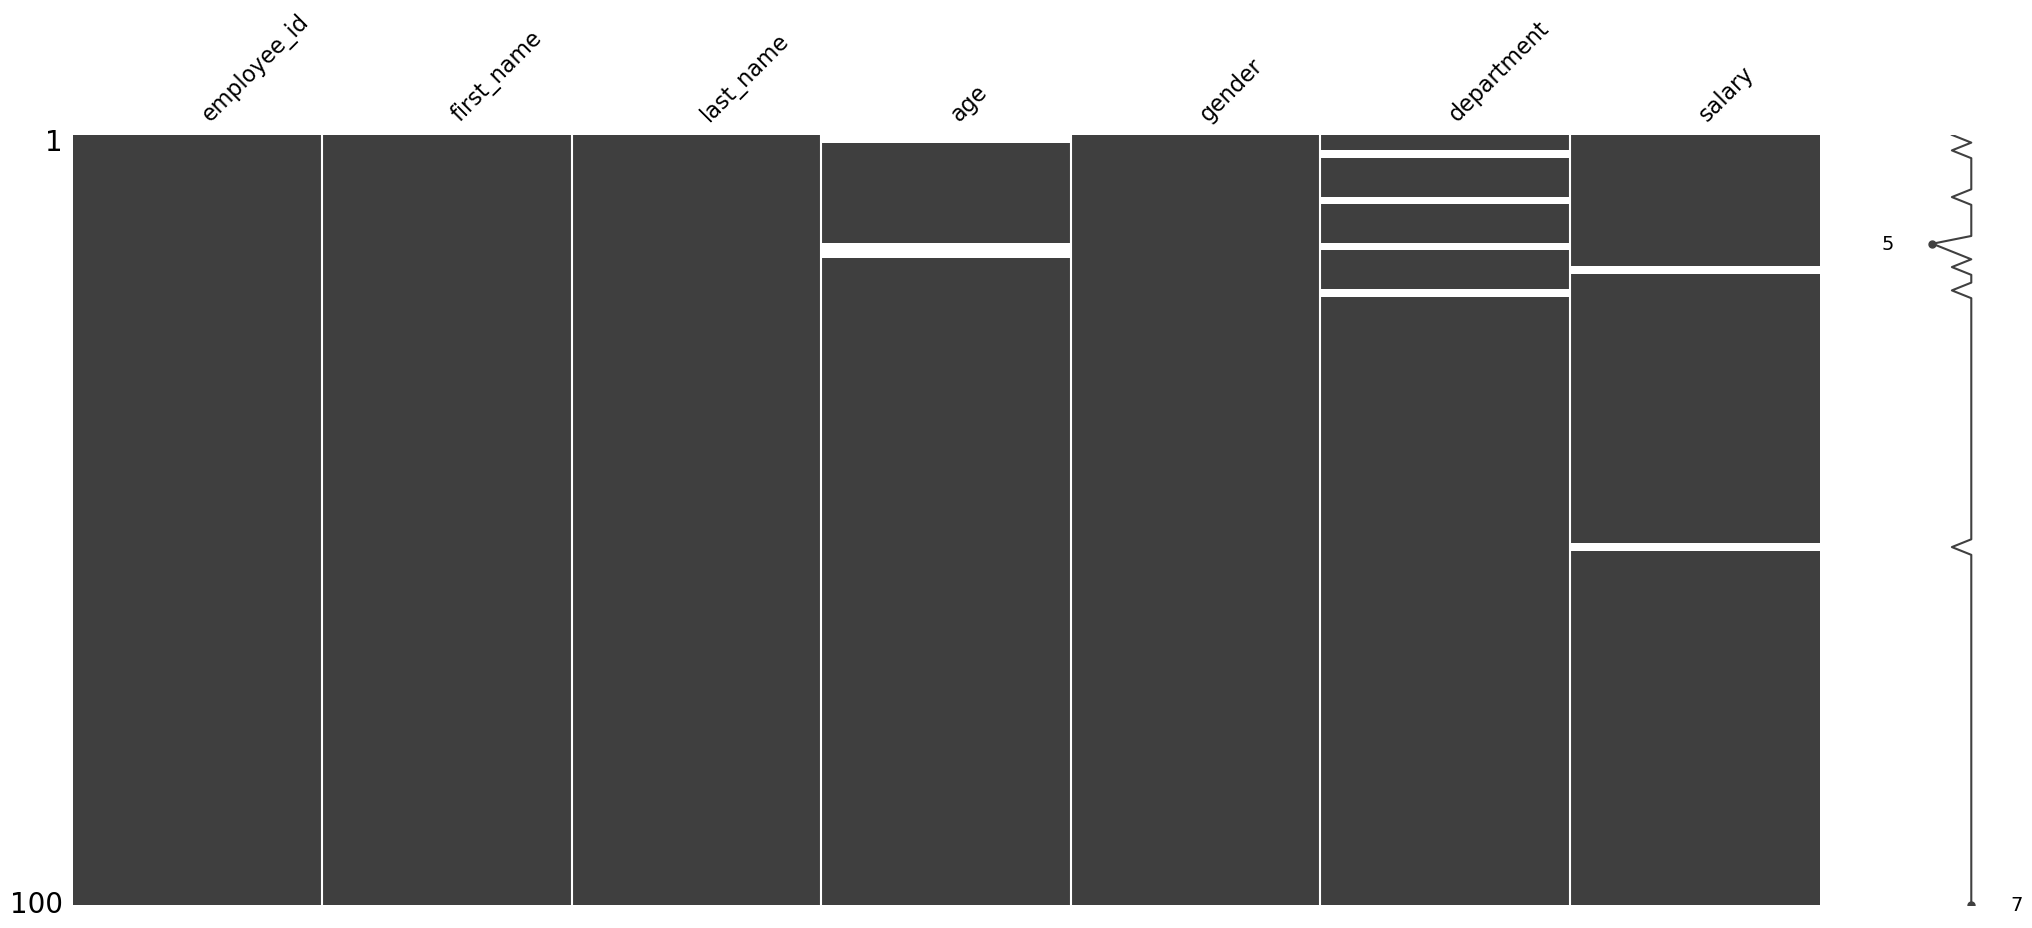

In [5]:
import missingno as mn
mn.matrix(df)

In [6]:
df.isnull().sum()

employee_id    0
first_name     0
last_name      0
age            3
gender         0
department     4
salary         2
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   employee_id  100 non-null    int64  
 1   first_name   100 non-null    object 
 2   last_name    100 non-null    object 
 3   age          97 non-null     float64
 4   gender       100 non-null    object 
 5   department   96 non-null     object 
 6   salary       98 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 5.6+ KB


In [8]:
df['department'].value_counts()

department
Marketing     17
Sales         17
HR            17
Operations    16
IT            14
Finance       13
IT             1
IT             1
Name: count, dtype: int64

In [9]:
df['department'].mode()

0           HR
1    Marketing
2        Sales
Name: department, dtype: object

In [10]:
df['department'] = df['department'].fillna(df['department'].mode()[0])

In [11]:
df.isnull().sum()

employee_id    0
first_name     0
last_name      0
age            3
gender         0
department     0
salary         2
dtype: int64

In [12]:
df['age'].mean()

31.88659793814433

In [13]:
df['age'].value_counts()

age
31.0    12
33.0    11
28.0     9
29.0     9
37.0     8
26.0     8
36.0     8
34.0     7
35.0     7
27.0     5
30.0     5
32.0     4
38.0     2
42.0     1
39.0     1
Name: count, dtype: int64

In [14]:
df['age'] = df['age'].fillna(df['age'].mean())

In [15]:
df['age'] = df['age'].astype(int)

In [16]:
df.head()

,employee_id,first_name,last_name,age,gender,department,salary
0,1,John,Doe,31,Male,Marketing,50000
1,2,Jane,Smith,28,Female,Sales,60000
2,3,Michael,Johnson,42,Male,HR,70000
3,4,Emily,Williams,31,Female,HR,55000
4,5,James,Brown,37,Male,Operations,65000


In [17]:
from sklearn.impute import KNNImputer
impute = KNNImputer(n_neighbors=2)

In [18]:
df = pd.read_csv('Employee_missing.csv')
df.head()

,employee_id,first_name,last_name,age,gender,department,salary
0,1,John,Doe,NaN,Male,Marketing,50000
1,2,Jane,Smith,28.0,Female,Sales,60000
2,3,Michael,Johnson,42.0,Male,NaN,70000
3,4,Emily,Williams,31.0,Female,HR,55000
4,5,James,Brown,37.0,Male,Operations,65000


In [28]:
column = df['age']
df_imputed = impute.fit_transform(column.values.reshape(-1,1))
df_imputed = df_imputed.astype('int')

In [29]:
df_imp = df.copy()

In [30]:
df_imp['age'] = df_imputed.flatten()

In [31]:
df_imp.head()

,employee_id,first_name,last_name,age,gender,department,salary
0,1,John,Doe,31,Male,Marketing,50000
1,2,Jane,Smith,28,Female,Sales,60000
2,3,Michael,Johnson,42,Male,NaN,70000
3,4,Emily,Williams,31,Female,HR,55000
4,5,James,Brown,37,Male,Operations,65000


# 